Note: This data is for single cell analysis so collaborative interactions could be a potential expansion for the project.

In [ ]:
!pip install scanpy anndata torch torchvision torchaudio pandas scikit-learn


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=1260490f098da01359db6bdc8310e437f3daabb74200306bf6eb3501eba14e84
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


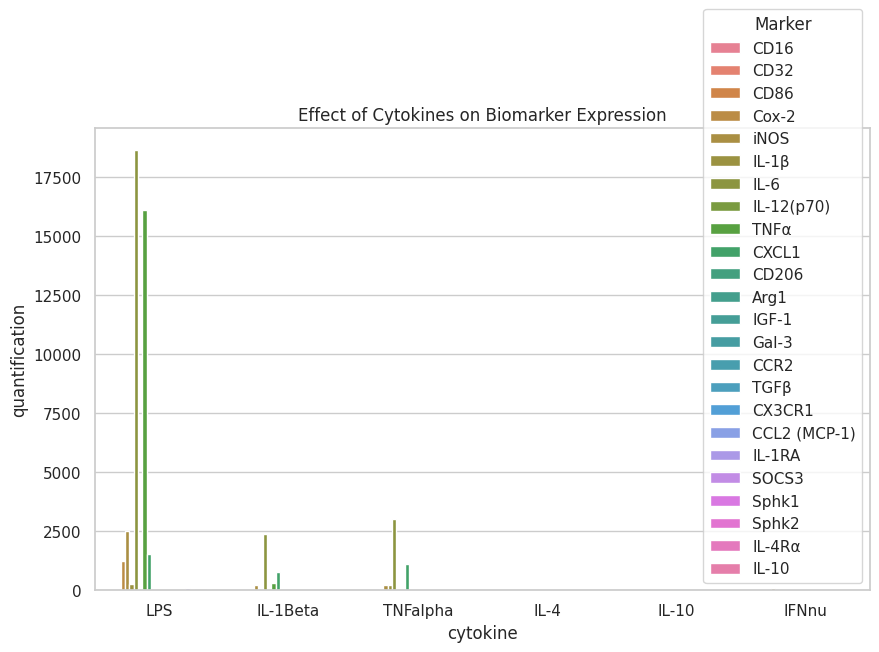

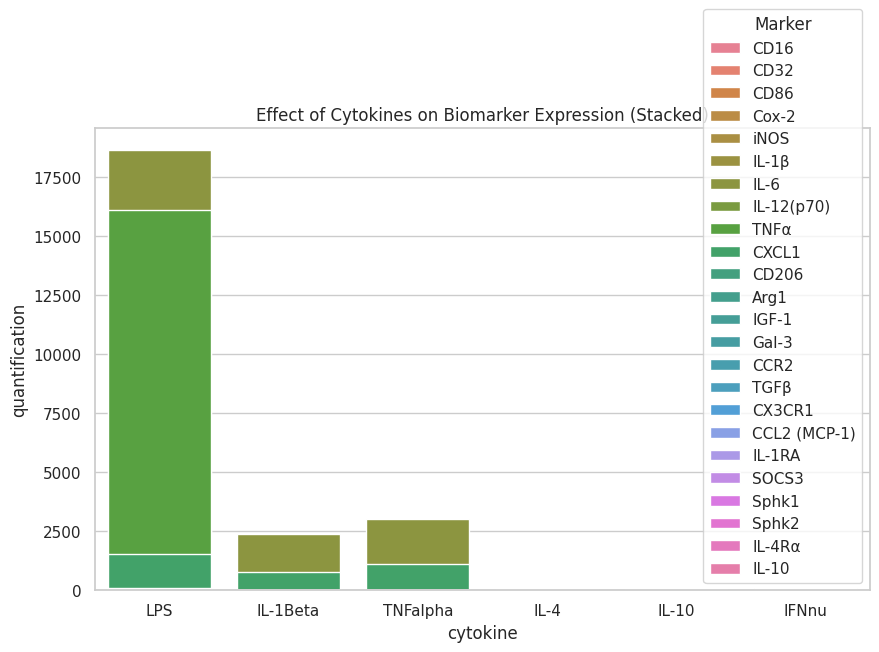

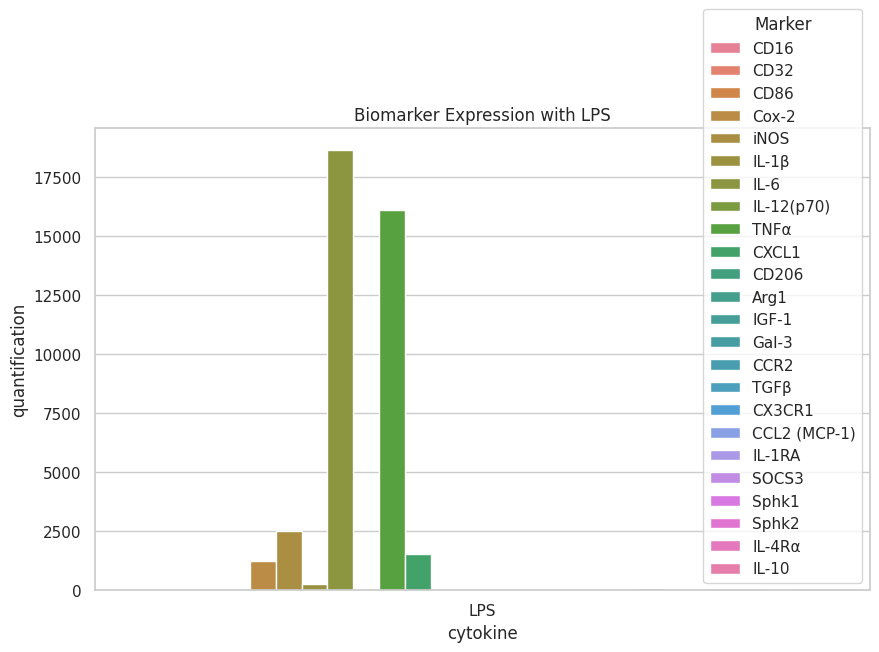

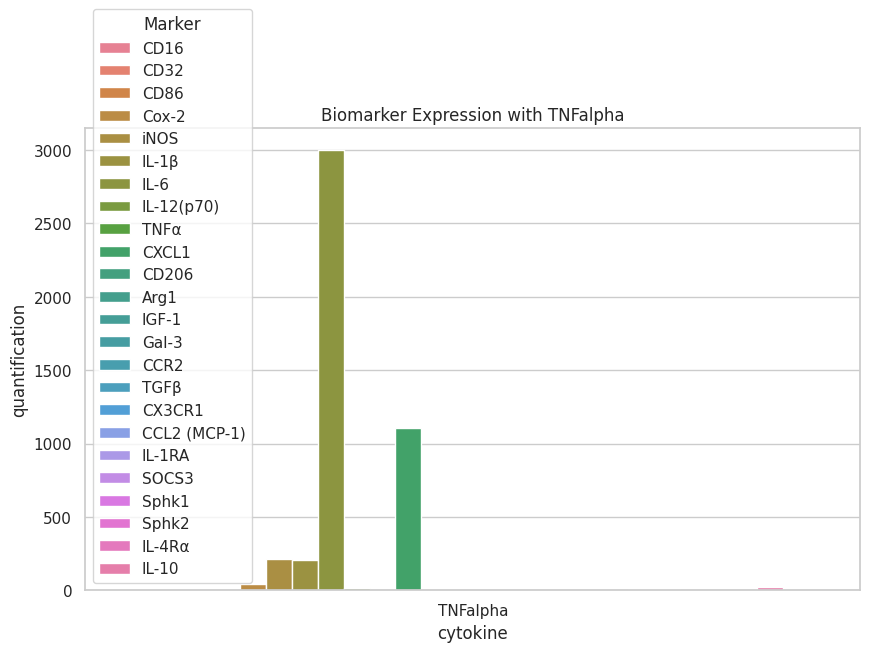

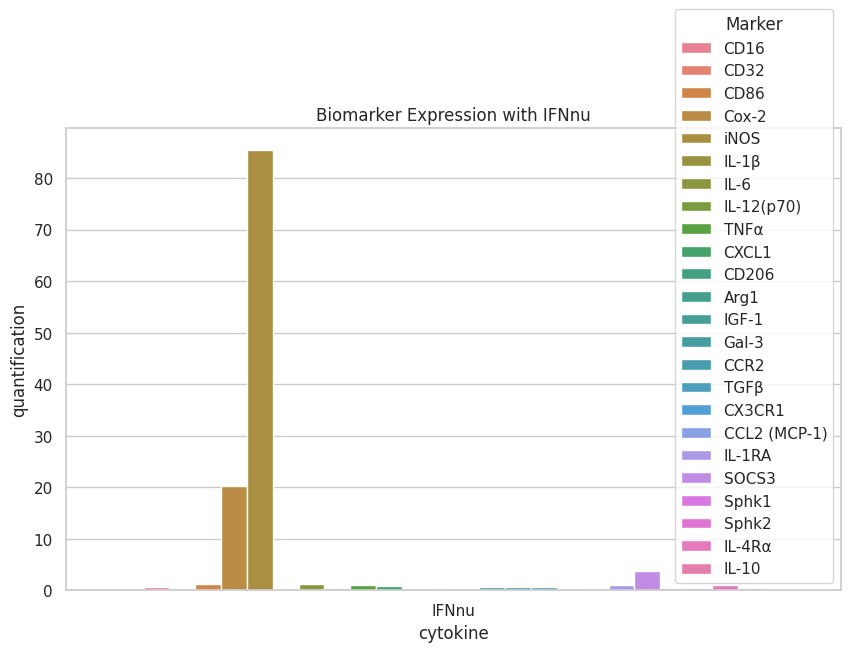

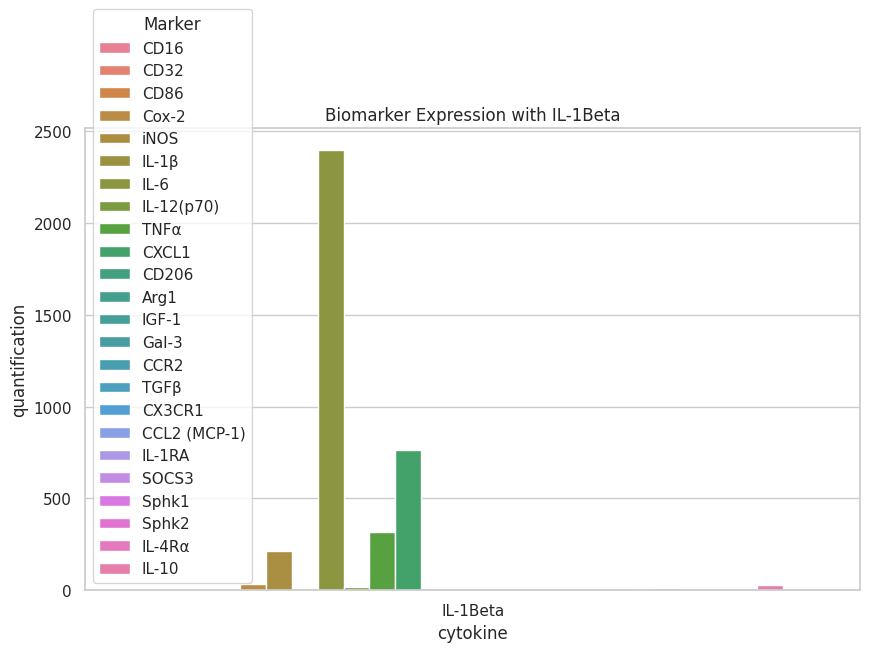

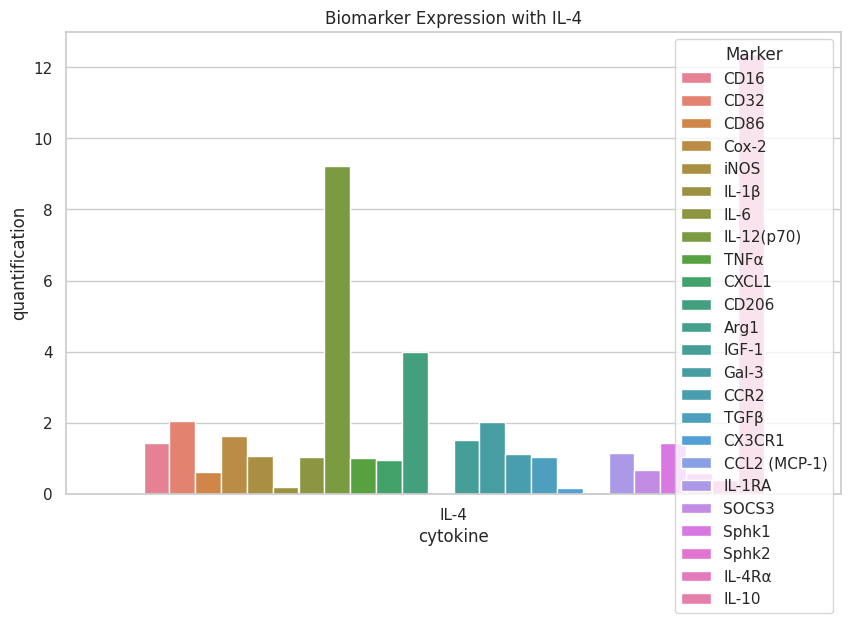

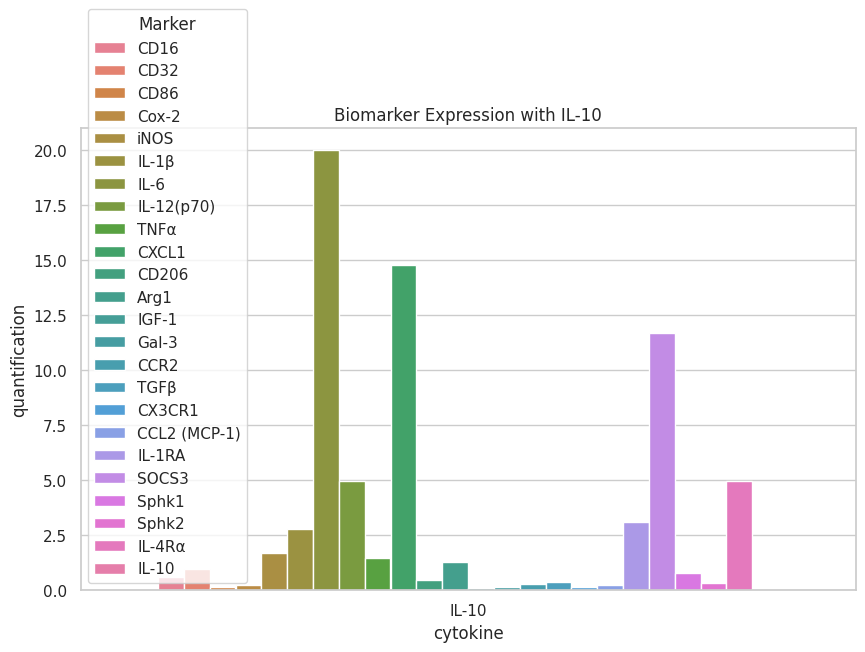

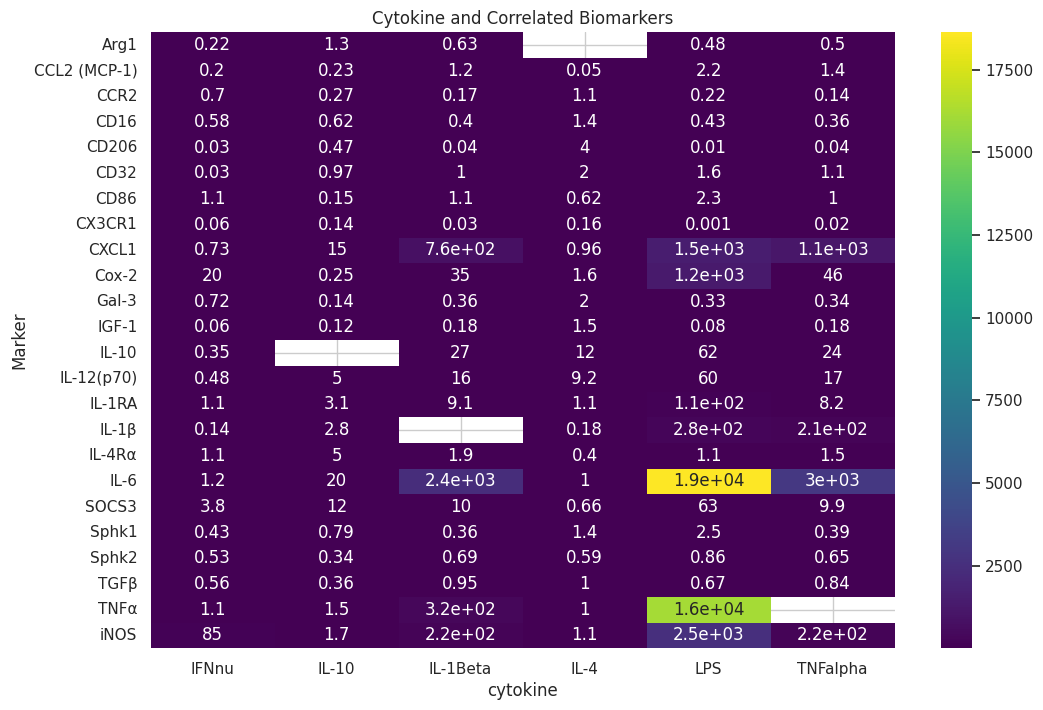

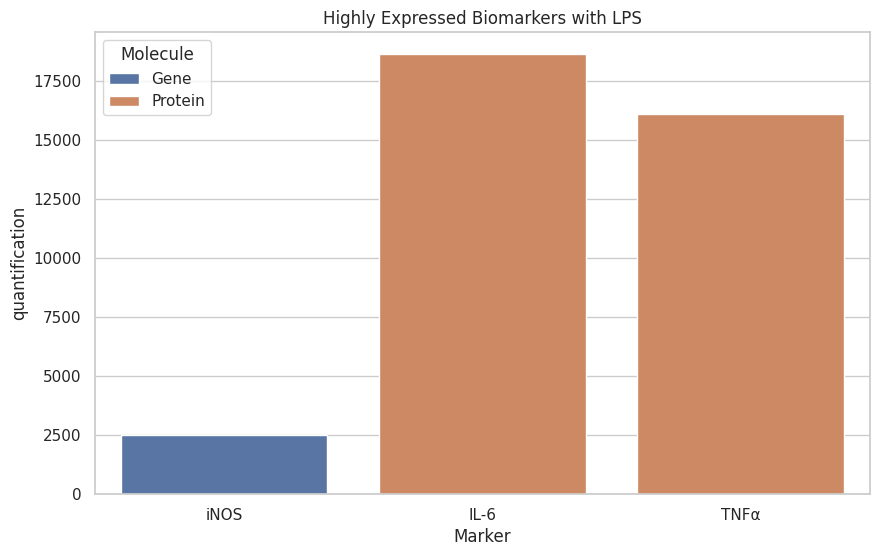

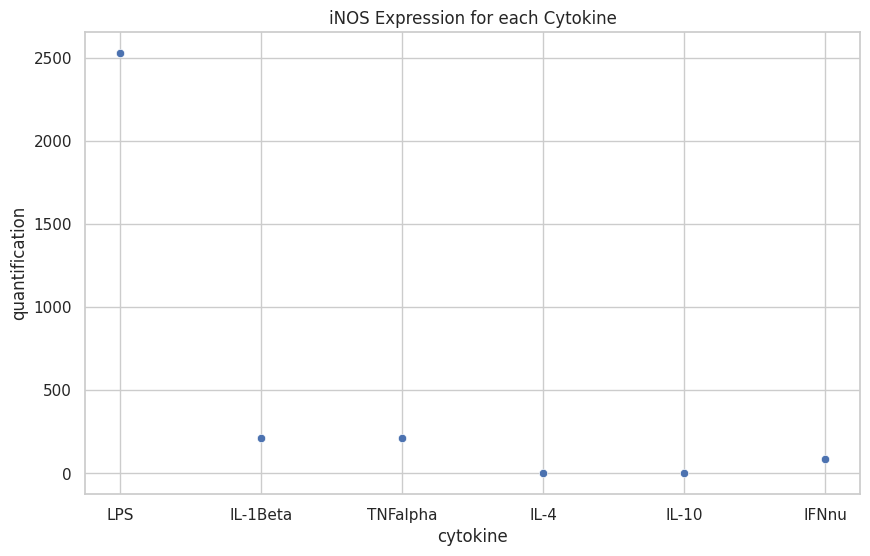

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (replace with your actual file path)
data = pd.read_csv("chhor_data.csv")

# Data Transformation (pivoting to long format)
main2 = pd.melt(data, id_vars=['Marker', 'Molecule'],
                value_vars=['LPS', 'IL-1Beta', 'TNFalpha', 'IL-4', 'IL-10', 'IFNnu'],
                var_name='cytokine', value_name='quantification')

# Set plot style
sns.set(style="whitegrid")

# General plot: Effect of Cytokines on Biomarker Expression
plt.figure(figsize=(10, 6))
sns.barplot(x='cytokine', y='quantification', hue='Marker', data=main2)
plt.title("Effect of Cytokines on Biomarker Expression")
plt.show()

# General stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cytokine', y='quantification', hue='Marker', data=main2, dodge=False)
plt.title("Effect of Cytokines on Biomarker Expression (Stacked)")
plt.show()

# Create plots for specific cytokines
cytokines = ['LPS', 'TNFalpha', 'IFNnu', 'IL-1Beta', 'IL-4', 'IL-10']

for cytokine in cytokines:
    filtered_data = main2[main2['cytokine'] == cytokine]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cytokine', y='quantification', hue='Marker', data=filtered_data)
    plt.title(f"Biomarker Expression with {cytokine}")
    plt.show()

# Heatmap of Cytokines and Biomarkers
heatmap_data = main2.pivot(index='Marker', columns='cytokine', values='quantification')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title("Cytokine and Correlated Biomarkers")
plt.show()

# Filter markers that are highly expressed with LPS
LPS_allMarkers = main2[main2['cytokine'] == 'LPS']
LPS_allMarkers_mean = LPS_allMarkers['quantification'].mean()

# Plot highly expressed biomarkers with LPS
high_expr_LPS = LPS_allMarkers[LPS_allMarkers['quantification'] > LPS_allMarkers_mean]
plt.figure(figsize=(10, 6))
sns.barplot(x='Marker', y='quantification', hue='Molecule', data=high_expr_LPS)
plt.title("Highly Expressed Biomarkers with LPS")
plt.show()

# Find which cytokine causes the greatest expression of a specific biomarker (e.g., iNOS)
specific_marker = 'iNOS'
iNOS_data = main2[main2['Marker'] == specific_marker]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cytokine', y='quantification', data=iNOS_data)
plt.title(f"{specific_marker} Expression for each Cytokine")
plt.show()
